In [615]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#pd.set_option('max_info_rows', 500)
pd.set_option('display.max_rows', 3000)

In [477]:
trade_df = pd.read_csv('./data/Risk_Detection_Qualification/t_trade.csv', index_col='rowkey', dtype={'id': np.str})
trade_test_df = pd.read_csv('./data/Risk_Detection_Qualification/t_trade_test.csv', index_col='rowkey', dtype={'id': np.str})
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
login_df = pd.read_csv('./data/Risk_Detection_Qualification/t_login.csv', index_col='log_id', 
                       dtype={'id': np.str, 'timestamp': np.str},
                       parse_dates=['time'], date_parser=dateparse)
login_test_df = pd.read_csv('./data/Risk_Detection_Qualification/t_login_test.csv', index_col='log_id', 
                            dtype={'id': np.str, 'timestamp': np.str},
                            parse_dates=['time'], date_parser=dateparse)
merged_login_df = login_df.append(login_test_df)
risk_id = trade_df[trade_df.is_risk==1]['id'].unique()
risk_login_df = merged_login_df[merged_login_df['id'].isin(risk_id)]
non_risk_login_df = merged_login_df[~(merged_login_df['id'].isin(risk_id))]

array([ 1, 31, -2, -4,  6, 22, -1,  5, 23,  3], dtype=int64)

In [614]:
trade_df[trade_df.is_risk==1].shape[0], trade_df[trade_df.is_risk==0].shape[0]

(3643, 129076)

In [618]:
def is_duplicate_records(rec1, rec2):
    check_fields = ['device', 'log_from', 'ip', 'city', 'result', 'type']
    check = True
    for field in check_fields:
        check = check && (rec1['result'] == rec1['result'])
    if check:
        pass
        # rec['time'] - rec['time'] < 3 minute
    return check

def remove_duplicate_login_records(login_df):
    result_df = pd.DataFrame()
    id_set = set(login_df['id'].values)
    print('len of id_set is ', len(id_set))
    count = 0
    for user_id in id_set:
        sub_login_df = login_df[login_df['id']==user_id].sort_values(by='time', ascending = True)
        removed_sub_login_df = pd.DataFrame()
        row_num = 0
        current_valie_row_num = 0
        while row_num < len(sub_login_df):
            row_num += 1
            if not is_duplicate_records(sub_login_df.iloc[current_valie_row_num], sub_login_df[row_num]):
                current_valid_row_num = row_num
            row_num += 1
                
        for i in range(len(sub_login_df)):
        for i in r
    return result_df
print(remove_duplicate_login_records(merged_login_df))

len of id_set is  28065
Empty DataFrame
Columns: []
Index: []


In [613]:
# 得到一列不同的值
login_df['result'].unique()
login_df['id'].unique()
len(login_df['city'].unique()), len(login_df.index)
trade_df.count()
merged_login_df.dtypes
trade_df[trade_df.id=='7134'].sort_values(by='time', ascending = True)  # 174422
# trade_test_df[trade_test_df.id=='7134'].sort_values(by='time', ascending = True)  # 174422
# login_df.sort_values(by='time', ascending = True)  # 174422
# merged_login_df['is_scan'].unique()
# len(merged_login_df[merged_login_df.device==835072]['id'].unique())

,time,id,is_risk
rowkey,,,
51668,2015-01-09 17:47:07.0,7134,1
51670,2015-01-09 17:47:16.0,7134,1
51676,2015-01-09 17:48:17.0,7134,1
51978,2015-01-09 18:45:19.0,7134,1
60325,2015-01-11 04:46:06.0,7134,1
60326,2015-01-11 04:46:30.0,7134,0
63115,2015-01-11 13:44:29.0,7134,1
63172,2015-01-11 13:54:55.0,7134,1
63259,2015-01-11 14:04:17.0,7134,1


In [616]:
# merged_login_df[merged_login_df.id=='7134'].sort_values(by='time', ascending = True)
merged_login_df.sort_values(by='time', ascending = True)
#merged_login_df[merged_login_df.device==835072].sort_values(by='time', ascending = True)
# merged_login_df[merged_login_df.ip==1256768].sort_values(by='time', ascending = True)
# merged_login_df[merged_login_df.city==238].sort_values(by='time', ascending = True)
# merged_login_df[merged_login_df.device==833972].sort_values(by='time', ascending = True)
# merged_login_df[merged_login_df.result==6].sort_values(by='time', ascending = True)
#merged_login_df[merged_login_df.timelong>=45739.0].sort_values(by='time', ascending = True)
# login_test_df[merged_login_df.device==1059981].sort_values(by='time', ascending = True)

,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
log_id,,,,,,,,,,,,
7.775528e+15,0.0,421584,2,1327200,364,1,1.420041615E9,1,113124,False,False,2015-01-01 00:00:15
5.707914e+14,3000.0,764868,1,1482812,102,1,1.420041629E9,3,121137,False,False,2015-01-01 00:00:29
2.350545e+16,2000.0,210427,2,1182527,103,1,1.420041654E9,3,9219,False,False,2015-01-01 00:00:54
2.161775e+16,12911.0,44973,1,1470338,485,1,1.420041655E9,3,100340,False,False,2015-01-01 00:00:55
7.393815e+15,12594.0,529364,1,869735,23,1,1.420041658E9,1,59555,False,False,2015-01-01 00:00:58
4.095511e+16,13416.0,604344,1,1531585,21,1,1.420041705E9,1,86966,False,False,2015-01-01 00:01:45
7.099710e+15,2000.0,723158,2,348066,488,1,1.420041741E9,3,173093,False,False,2015-01-01 00:02:21
6.124969e+15,2000.0,573435,2,458628,436,1,1.420041747E9,3,69125,False,False,2015-01-01 00:02:27
6.828857e+15,12426.0,802594,1,222152,306,1,1.420041809E9,1,95422,False,False,2015-01-01 00:03:29


显示某一列数值的分布情况

In [215]:
trade_df.shape, trade_df[trade_df['is_risk']==0].shape, trade_df[trade_df['is_risk']==1].shape
login_df.count()
#trade_df.is_risk.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
trade_df.is_risk.value_counts(normalize=True)
len(merged_login_df['device'].unique())
#login_df.is_sec.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
#login_test_df.is_sec.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
#login_test_df.info()

164532

In [25]:
trade_df_by_id = trade_df['is_risk'].groupby(trade_df['id'])

id_risk_trade   = trade_df[trade_df['is_risk']==1]['id']
id_nonrisk_trade = trade_df[trade_df['is_risk']==0]['id']
checked_id = set(id_risk) & set(id_nonrisk)
len(id_risk), len(id_nonrisk), len(checked_id)

(3643, 129076, 455)

In [74]:
login_df_by_id = login_df.groupby(login_df['id']).count()
print(login_df_by_id)
#ratio = len(trade_df[trade_df['is_risk']==1])/len(trade_df)
#len(trade_df[trade_df['is_risk']==1]), len(trade_df)
# login_df['id']

        timelong  device  log_from   ip  city  result  timestamp  type  \
id                                                                       
100002         9       9         9    9     9       9          9     9   
100006        21      21        21   21    21      21         21    21   
100019         4       4         4    4     4       4          4     4   
100020        36      36        36   36    36      36         36    36   
100024        11      11        11   11    11      11         11    11   
100027         3       3         3    3     3       3          3     3   
100039        25      25        25   25    25      25         25    25   
100046        45      45        45   45    45      45         45    45   
100058        18      18        18   18    18      18         18    18   
100063        10      10        10   10    10      10         10    10   
100068         9       9         9    9     9       9          9     9   
100070         9       9         9    

显示trade_df和test_df中id的关系

In [177]:
login_id_set = set(login_df['id'])
login_test_id_set = set(login_test_df['id'])
trade_id_set = set(trade_df['id'])
trade_test_id_set = set(trade_test_df['id'])
trade_test_id_set < (login_test_id_set | login_id_set)
#len(trade_id_set), len(trade_test_id_set)
# set(merged_login_df['id']) == (trade_id_set | trade_test_id_set)
# set(merged_login_df['id']) > trade_id_set, login_id_set > trade_id_set

True

对比显示：对于有危险登录的id和没有危险登录的id，在历史登录记录中ip数量 city数量分布

In [156]:
risk_id = trade_df[trade_df.is_risk==1]['id'].unique()
len(risk_id)
ip_count = login_df[['ip', 'id']].groupby('id').count()
risk_ip_count = ip_count[ip_count.index.isin(risk_id)]
# risk_ip_count['ip'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
nonrisk_ip_count = ip_count[~(ip_count.index.isin(risk_id))]
nonrisk_ip_count['ip'].mean()
trade_test_df[trade_test_df.id.isin(risk_id)]
len(risk_id), list(risk_id)
#login_id_set

(1086,
 ['18138',
  '65489',
  '90970',
  '55986',
  '154625',
  '131624',
  '163711',
  '141236',
  '97238',
  '173999',
  '118753',
  '80396',
  '138243',
  '98286',
  '173410',
  '122113',
  '102090',
  '29224',
  '83331',
  '45779',
  '34225',
  '123981',
  '174435',
  '122223',
  '50477',
  '127540',
  '33748',
  '115114',
  '97310',
  '15525',
  '20682',
  '7134',
  '228',
  '123213',
  '149027',
  '52866',
  '111549',
  '55050',
  '40177',
  '141710',
  '20854',
  '65116',
  '19541',
  '107796',
  '92925',
  '153553',
  '175112',
  '125538',
  '130018',
  '38375',
  '32826',
  '84716',
  '167880',
  '109284',
  '60226',
  '75282',
  '80795',
  '127432',
  '43005',
  '81956',
  '109226',
  '5965',
  '135740',
  '76586',
  '81543',
  '72144',
  '99157',
  '92767',
  '108496',
  '101757',
  '119082',
  '15668',
  '85214',
  '140090',
  '58293',
  '137984',
  '82036',
  '92347',
  '10946',
  '175471',
  '98434',
  '104475',
  '101333',
  '84910',
  '53540',
  '111456',
  '148545',
 

显示某一个数值是否有同一ip多个帐号的情况

In [132]:
id_per_ip_count = login_df[['ip', 'id']].groupby('ip').count()
id_per_ip_count['id'].max()
id_per_ip_count.sort_values(by='id', ascending = False)

,id
ip,
359080,20408
847186,1737
1128532,871
1551343,813
1297757,467
877190,455
621905,384
451870,379
743802,331


显示device有不同id的情况

In [216]:
device_count = merged_login_df[['device', 'id']].groupby('device').count().sort_values(by='id', ascending = False)
device_count

,id
device,
835072,83636
225121,1096
926288,670
427691,590
215189,566
253357,564
511707,532
728381,516
274216,508


显示不同ip对应不同id的情况

In [220]:
ip_count = merged_login_df[['ip', 'id']].groupby('ip').count().sort_values(by='id', ascending = False)
ip_count

,id
ip,
359080,20408
847186,1737
1551343,950
1128532,871
451870,575
877190,545
1297757,490
1485916,470
621905,439


In [ ]:
对比显示risk_id和non_risk登录result分布情况

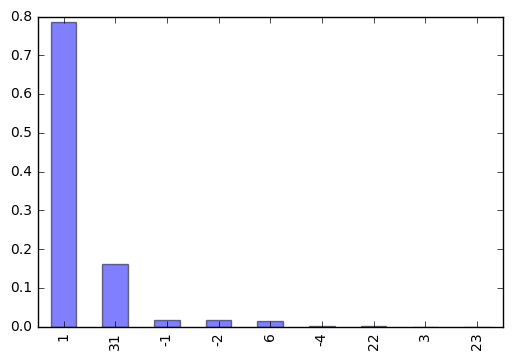

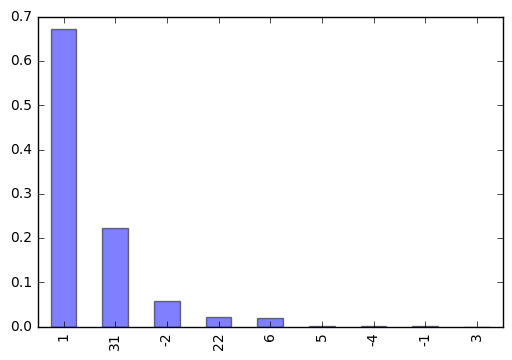

In [291]:
# result_count = merged_login_df['result'].value_counts(normalize=True)
non_risk_login_df['result'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()
risk_login_df['result'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()
# risk_ip_count = ip_count[ip_count.index.isin(risk_id)]
# risk_ip_count['ip'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
# nonrisk_ip_count = ip_count[~(ip_count.index.isin(risk_id))]

In [ ]:
对比显示risk_id和non_risk登录log_from分布情况

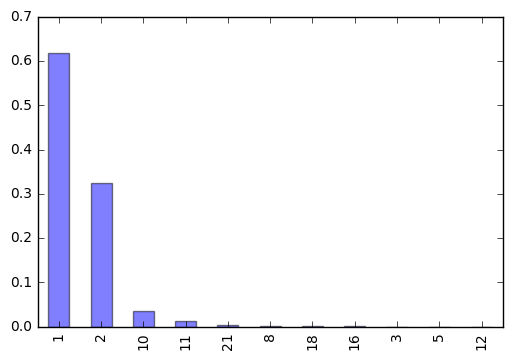

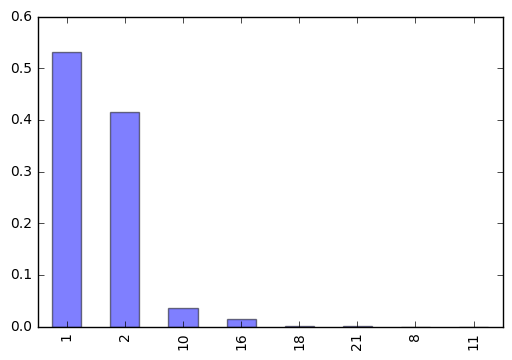

In [292]:
non_risk_login_df['log_from'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()
risk_login_df['log_from'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()

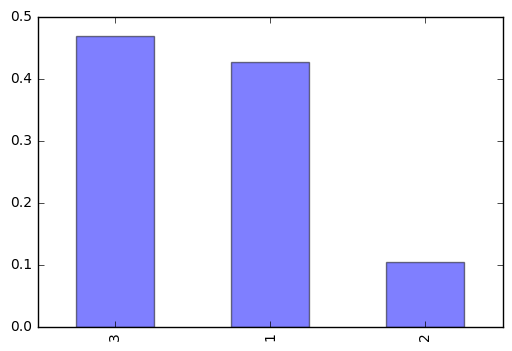

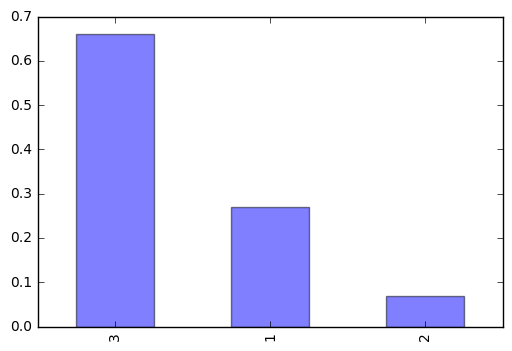

In [399]:
non_risk_login_df['type'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()
risk_login_df['type'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()

In [337]:
id_count = trade_df['id'].groupby(trade_df['id']).count().sort_values(ascending = False)
id_count
#trade_df['result'].groupby(trade_df['id'])

id
54645     1095
49567      654
42908      566
74148      413
59055      367
54529      312
68595      282
97513      281
66294      258
115201     242
120335     241
92529      224
17557      220
36076      197
113760     182
165183     180
135767     146
101777     145
58635      144
83860      139
147174     135
96292      134
134720     128
39387      128
37279      127
123284     126
21283      122
115578     115
99470      111
38066      111
112171     108
151823     106
77170      105
154260     103
52893      102
120784     101
171345     101
78572      100
141674      98
95913       98
131113      96
135490      96
75425       94
23909       94
127282      94
122703      93
118933      92
132044      91
30346       91
79730       91
160524      91
158045      90
103902      87
130930      86
95458       85
85435       83
154650      83
126066      83
156796      82
58551       82
126810      82
37160       82
42197       81
141953      79
140111      79
73272       78
152127 

In [322]:
non_risk_login_df[non_risk_login_df.device==835072]
risk_login_df[risk_login_df.device==835072]

,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
log_id,,,,,,,,,,,,
1.934557e+16,6.0,835072,11,1067892,374,1,1.427953637E9,1,12653,False,False,2015-04-02 13:47:17
9.835055e+15,3621.0,835072,1,1203943,194,31,1.426594455E9,3,110346,False,False,2015-03-17 20:14:15
8.592159e+15,16447.0,835072,1,1506536,358,31,1.428831288E9,3,41428,False,False,2015-04-12 17:34:48
3.383243e+15,7000.0,835072,2,1069804,8,1,1.432343597E9,3,105035,False,False,2015-05-23 09:13:17
4.429197e+16,10000.0,835072,2,1069804,8,31,1.432343591E9,3,105035,False,False,2015-05-23 09:13:11
4.982060e+15,5736.0,835072,1,1463291,492,-2,1.428188221E9,3,9494,False,False,2015-04-05 06:57:01
1.684749e+15,2890.0,835072,1,1140840,492,31,1.42826994E9,3,24496,False,False,2015-04-06 05:39:00
2.913852e+16,4498.0,835072,1,604978,492,31,1.427824676E9,3,122960,False,False,2015-04-01 01:57:56
4.035165e+16,5121.0,835072,1,58475,194,1,1.424380063E9,3,114390,False,False,2015-02-20 05:07:43


In [460]:
def check_whether_same_day(time1, time2):
    time1 = pd.DatetimeIndex([time1])
    time2 = pd.DatetimeIndex([time2])
    year1, month1, day1 = time1.year[0], time1.month[0], time1.day[0]
    year2, month2, day2 = time2.year[0], time2.month[0], time2.day[0]
    print('year1 month1 day1 ', year1, month1, day1)
    print('year2 month2 day2 ', year2, month2, day2)
    same_day = (year1==year2 and month1==month2 and day1==day2)
    return 1 if same_day else 0

In [535]:
login_sub_df = merged_login_df.sort_values(by='time')
trade_time = login_sub_df['time'].values[29]
trade_time_1 = login_sub_df['time'].values[-10]

user_id = login_sub_df['id'].values[-10]

print('trade_time is ', trade_time, trade_time_1)
year = pd.DatetimeIndex([trade_time]).year[0]
month = pd.DatetimeIndex([trade_time]).month[0]
day = pd.DatetimeIndex([trade_time]).day[0]

print('check_whether_same_day is ', check_whether_same_day(trade_time, trade_time_1))

train_df = pd.read_csv('./data/train_data.csv', index_col='rowkey')

trade_time is  2015-01-01T00:14:13.000000000 2015-07-31T23:57:36.000000000
year1 month1 day1  2015 1 1
year2 month2 day2  2015 7 31
check_whether_same_day is  0


In [ ]:
判断一天之中某个时间段内登录是否为risk的概率比较大

In [582]:
trade_new_df = pd.read_csv('./data/Risk_Detection_Qualification/t_trade_test_new.csv', 
                           index_col='rowkey', parse_dates=['time'], 
                           date_parser=dateparse)
time_series = pd.DatetimeIndex(trade_new_df['time'])
trade_new_df['hour'] = time_series.hour
trade_new_df['minute'] = time_series.minute

sub_trade_new_df = trade_new_df.copy()
sub_trade_new_df = sub_trade_new_df[sub_trade_new_df.hour>=1] 
sub_trade_new_df = sub_trade_new_df[sub_trade_new_df.hour<=7]


def get_ratio(hour_start, hour_end):
    global trade_new_df
    sub_trade_new_df = trade_new_df.copy()
    sub_trade_new_df = sub_trade_new_df[sub_trade_new_df.hour>=hour_start] 
    sub_trade_new_df = sub_trade_new_df[sub_trade_new_df.hour<=hour_end]
    print(sub_trade_new_df['is_risk'].value_counts(normalize=True), 
          'len is ', sub_trade_new_df[sub_trade_new_df.is_risk==1].shape[0])

sub_trade_new_df.shape[0], trade_new_df.shape[0]
# get_ratio(1, 6)
# print('all day long is: ', trade_new_df['is_risk'].value_counts(normalize=True), 'len is ', trade_new_df[trade_new_df.is_risk==1].shape[0])


(1176, 17875)

In [600]:
train_df = pd.read_csv('./data/train_data.csv', index_col='rowkey')
train_df.dtypes
is_scan_train_df = train_df[train_df['is_scan1_1.0']==1.0]

In [603]:
is_scan_train_risk_df = is_scan_train_df[is_scan_train_df.is_risk==1]
is_scan_train_risk_df

,id,change_city_min_elaspe,last_device_elapse,last_ip_elapse,last_city_elapse,today_first_trade,today_first_login,last_trade_elapse,last_login_elapse,trade_login_elapse,...,is_scan1_0.0,is_scan1_1.0,is_scan1_nan,is_scan2_0.0,is_scan2_1.0,is_scan2_nan,is_scan3_0.0,is_scan3_1.0,is_scan3_nan,is_risk
rowkey,,,,,,,,,,,,,,,,,,,,,
64615,7134,405.216667,12069.435330,2665.466667,17.050000,0,0,125.750000,17.050000,18.283333,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
118144,109226,499.866667,12069.435330,4795.900158,12434.661155,0,1,1.600000,499.866667,15.150000,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
121133,76586,0.683333,4834.200000,4795.900158,956.066667,0,1,0.550000,956.066667,61.766667,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
158303,10946,2412.216667,12069.435330,332.133333,332.133333,0,0,130.466667,332.133333,5.150000,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
315209,31112,1.400000,12069.435330,218.400000,9.733333,0,0,5.750000,9.733333,3.550000,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
338736,44629,0.400000,12069.435330,0.350000,0.350000,1,0,3532.766667,0.350000,1.300000,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
368778,44988,35683.833333,12069.435330,4795.900158,12434.661155,1,1,56927.950000,51135.816667,8688.550000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
368780,44988,35683.833333,12069.435330,4795.900158,12434.661155,0,1,0.466667,51135.816667,8689.016667,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
385089,77593,0.583333,12069.435330,4795.900158,12434.661155,0,0,4.583333,6.000000,3.766667,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
